In [ ]:
import pandas as pd
import os
import os
import json
from google.colab import drive
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Force Mount Drive
drive.mount('/content/drive', force_remount=True)

# Define folder path
project_folder = "/content/drive/MyDrive/UCSD_Academics/Fall25/COGS150"

# Define the filenames
file_explicit = "experiment_reuslts_signal_20251209_193310.csv"
file_implicit = "experiment_reuslts_no_signal_20251209_194648.csv" # Or whatever you named your second file

# load csv
try:
    path_exp = os.path.join(project_folder, file_explicit)
    path_imp = os.path.join(project_folder, file_implicit)

    df_explicit = pd.read_csv(path_exp)
    df_implicit = pd.read_csv(path_imp)

    df_explicit["Context_Type"] = "Explicit"
    df_implicit["Context_Type"] = "Implicit"

    print(f" Loaded Explicit Data: {len(df_explicit)} rows")
    print(f" Loaded Implicit Data: {len(df_implicit)} rows")

    df_combined = pd.concat([df_explicit, df_implicit], ignore_index=True)

    print(df_combined.head())

except FileNotFoundError as e:
    print(f" Error{e}")

Mounted at /content/drive
 Loaded Explicit Data: 40 rows
 Loaded Implicit Data: 40 rows

--- Combined Data Preview ---
     model                               trial  prob_native_congruent  \
0  GPT2-XL       Utensils (Chopsticks vs Fork)           2.730993e-08   
1  GPT2-XL                 Lunar New Year Food           4.691864e-07   
2  GPT2-XL          Hot Water for Stomach Pain           3.216805e-07   
3  GPT2-XL  Wedding Dress Color (Red vs White)           5.797886e-05   
4  GPT2-XL                Reaction to Sneezing           7.850521e-10   

   prob_native_violation  prob_eng_congruent  prob_eng_violation  \
0           4.115137e-09        6.139380e-08        7.027481e-09   
1           1.746623e-11        6.053303e-11        2.330467e-09   
2           6.512064e-09        1.678504e-06        4.099093e-09   
3           7.347378e-06        6.733925e-07        3.366751e-06   
4           3.595129e-21        7.630536e-07        5.894661e-09   

   suprisal_native_congruent  sup

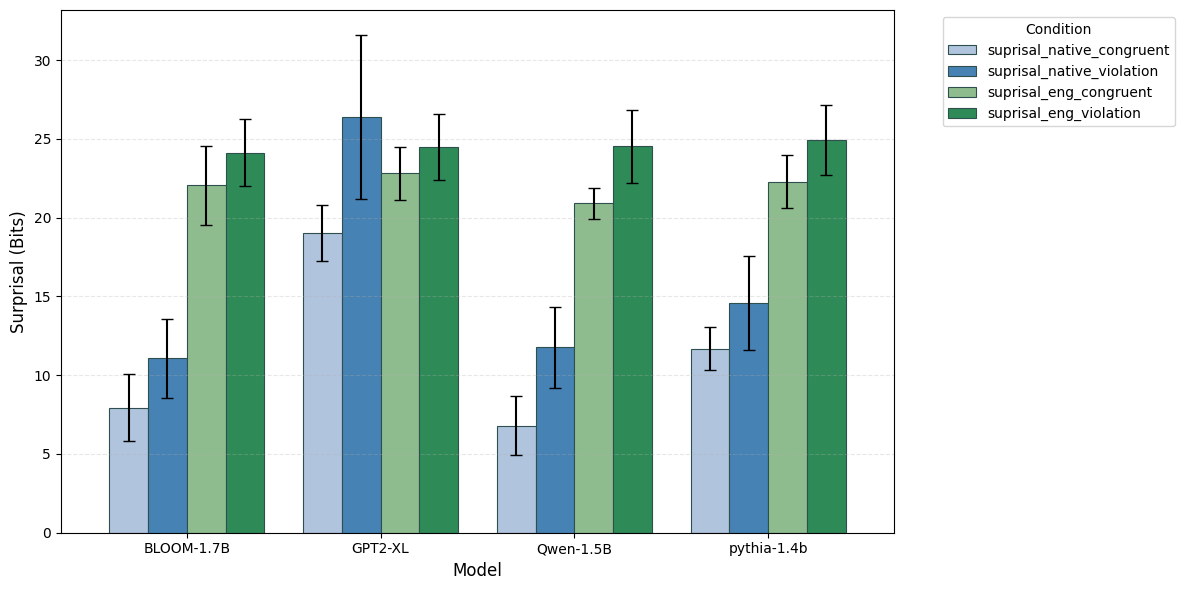

In [ ]:
# Calculate the mean suprisal of all four catagories in explicit signaling context

df_means_explicit = df_explicit.groupby("model")[
    ['suprisal_native_congruent', 'suprisal_native_violation',
     'suprisal_eng_congruent', 'suprisal_eng_violation']
].mean()

df_errors_explicit = df_explicit.groupby("model")[
    ['suprisal_native_congruent', 'suprisal_native_violation',
     'suprisal_eng_congruent', 'suprisal_eng_violation']
].sem()

# Plotting
ordered_columns = [
    'suprisal_native_congruent',
    'suprisal_native_violation',
    'suprisal_eng_congruent',
    'suprisal_eng_violation'
]

custom_colors = [
    'lightsteelblue',
    'steelblue',
    'darkseagreen',
    'seagreen'
]

ax = df_means_explicit.plot(
    kind="bar",
    yerr=df_errors_explicit[ordered_columns],
    capsize=4,
    figsize=(12, 6),
    width=0.8,
    color=custom_colors,
    rot=0,
    edgecolor='darkslategrey',
    linewidth=0.8
)

plt.title("Mean Surprisal by Model & Condition(With Signaling)", fontsize=14)
plt.ylabel("Surprisal (Bits)", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.legend(title="Condition", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

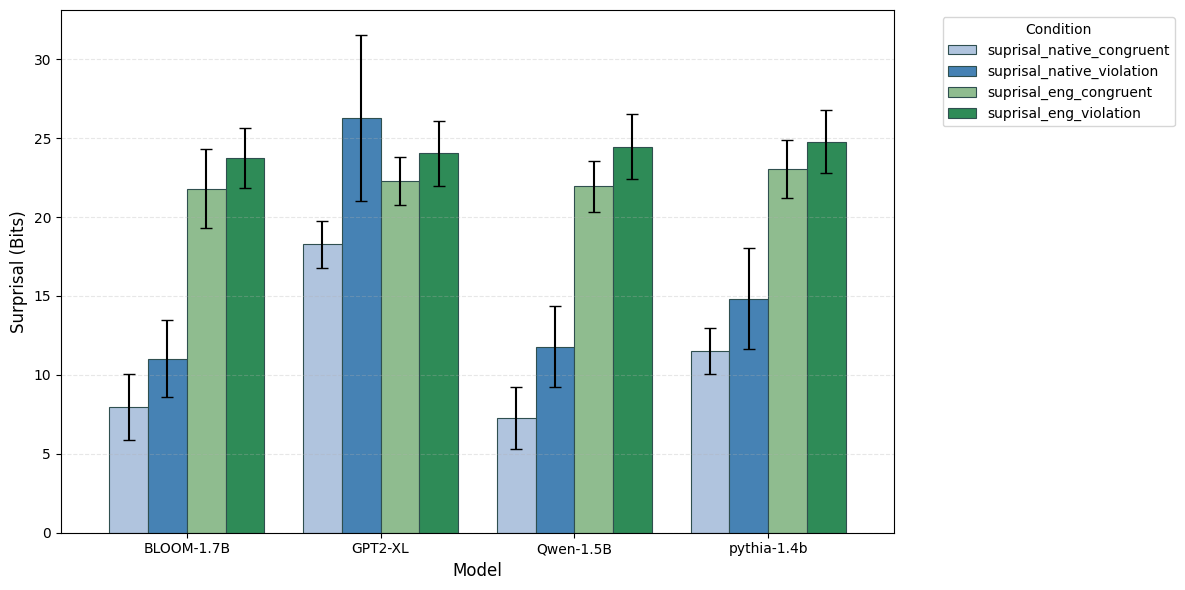

In [ ]:
# Calculate the mean suprisal of all four catagories in no signaling context

df_means_implicit = df_implicit.groupby("model")[
    ['suprisal_native_congruent', 'suprisal_native_violation',
     'suprisal_eng_congruent', 'suprisal_eng_violation']
].mean()

df_errors_implicit = df_implicit.groupby("model")[
    ['suprisal_native_congruent', 'suprisal_native_violation',
     'suprisal_eng_congruent', 'suprisal_eng_violation']
].sem()

# Plotting
ordered_columns = [
    'suprisal_native_congruent',
    'suprisal_native_violation',
    'suprisal_eng_congruent',
    'suprisal_eng_violation'
]

custom_colors = [
    'lightsteelblue',  # Muted Light Blue
    'steelblue',       # Muted Dark Blue
    'darkseagreen',    # Muted Light Green
    'seagreen'         # Muted Dark Green
]

ax = df_means_implicit.plot(
    kind="bar",
    yerr=df_errors_implicit[ordered_columns],
    capsize=4,
    figsize=(12, 6),
    width=0.8,
    color=custom_colors,
    rot=0,
    edgecolor='darkslategrey',
    linewidth=0.8
)


plt.title("Mean Surprisal by Model & Condition(Without Signaling)", fontsize=14)
plt.ylabel("Surprisal (Bits)", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.legend(title="Condition", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Print the means of each condition for internal validity check
print(df_means_implicit.head())
print(df_means_explicit.head())

             suprisal_native_congruent  suprisal_native_violation  \
model                                                               
BLOOM-1.7B                    7.984747                  11.014636   
GPT2-XL                      18.287249                  26.293986   
Qwen-1.5B                     7.260250                  11.773678   
pythia-1.4b                  11.516333                  14.834768   

             suprisal_eng_congruent  suprisal_eng_violation  
model                                                        
BLOOM-1.7B                21.795566               23.750882  
GPT2-XL                   22.299465               24.032707  
Qwen-1.5B                 21.953052               24.457520  
pythia-1.4b               23.047794               24.778798  
             suprisal_native_congruent  suprisal_native_violation  \
model                                                               
BLOOM-1.7B                    7.950716                  11.076942   
GPT2-X

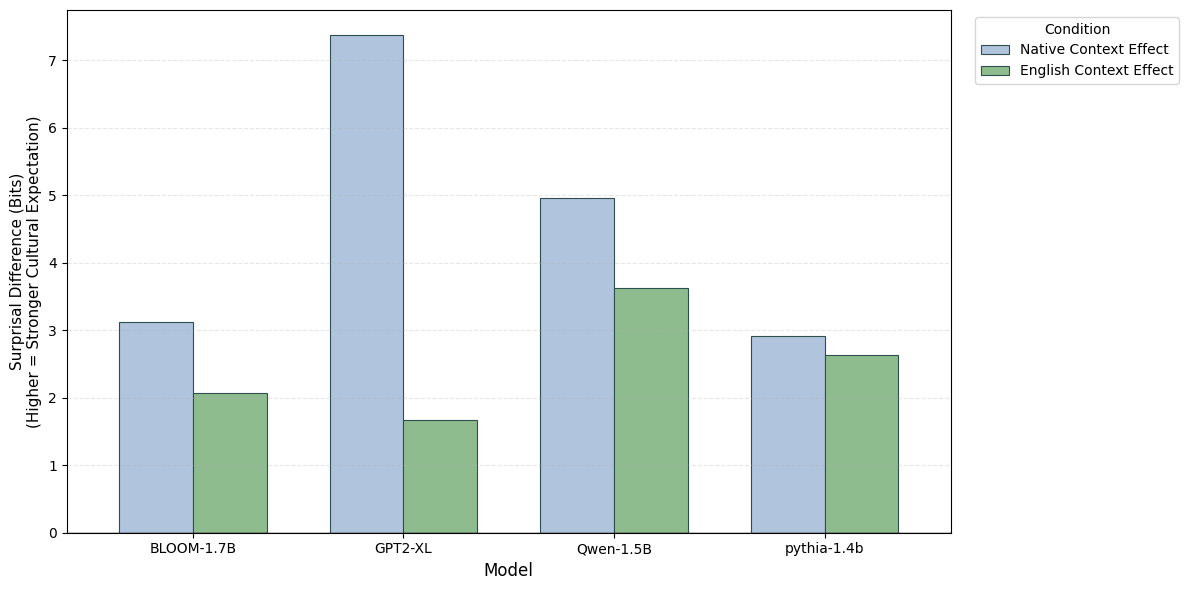

In [ ]:
df_diff_sig = pd.DataFrame(index=df_means_explicit.index)
df_diff_sig["Native Context Effect"] = (
    df_means_explicit['suprisal_native_violation'] - df_means_explicit['suprisal_native_congruent']
)
df_diff_sig["English Context Effect"] = (
    df_means_explicit['suprisal_eng_violation'] - df_means_explicit['suprisal_eng_congruent']
)


diff_colors = [
    'lightsteelblue',
    'darkseagreen'
]

# 3. Plot
ax = df_diff_sig.plot(
    kind="bar",
    capsize=4,
    figsize=(12, 6),
    width=0.7,
    color=diff_colors,
    rot=0,
    edgecolor='darkslategrey',
    linewidth=0.8
)


plt.title("Cultural Sensitivity: Difference in Surprisal (Violation - Congruent) (With Signaling)", fontsize=14)
plt.ylabel("Surprisal Difference (Bits)\n(Higher = Stronger Cultural Expectation)", fontsize=11)
plt.xlabel("Model", fontsize=12)

plt.axhline(0, color='black', linewidth=1, linestyle='-')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(title="Condition", bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()

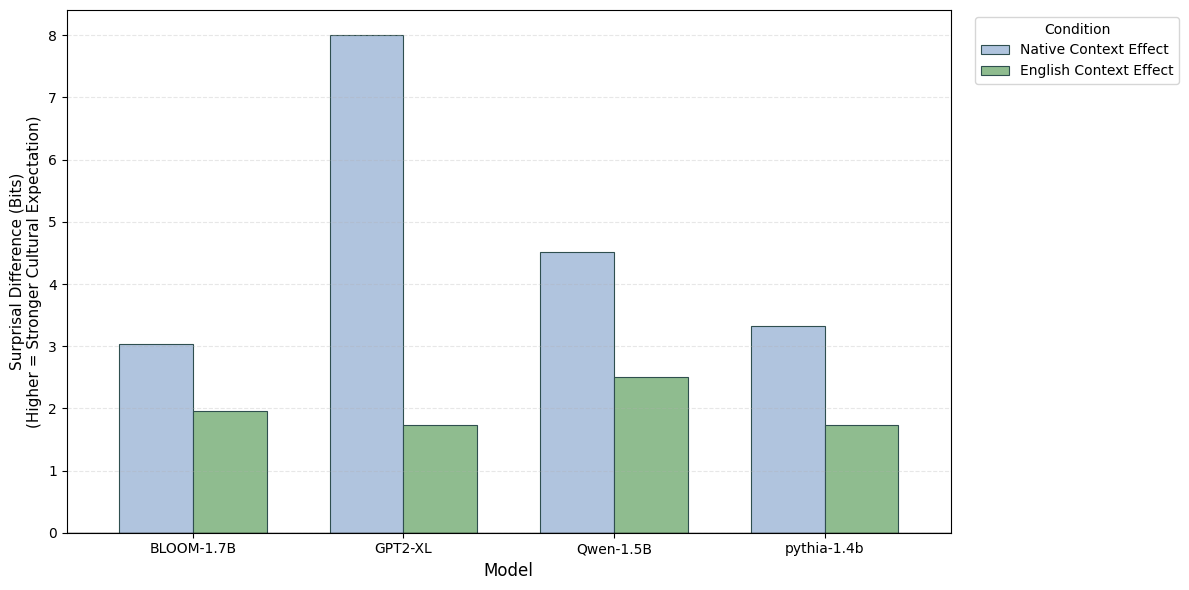

In [ ]:
# Difference in mean surprise between cultural congruent and violating target, under native and English context, without explicit signalling
df_diff_no_sig = pd.DataFrame(index=df_means_implicit.index)
df_diff_no_sig["Native Context Effect"] = (
    df_means_implicit['suprisal_native_violation'] - df_means_implicit['suprisal_native_congruent']
)
df_diff_no_sig["English Context Effect"] = (
    df_means_implicit['suprisal_eng_violation'] - df_means_implicit['suprisal_eng_congruent']
)


diff_colors = [
    'lightsteelblue',
    'darkseagreen'
]

# 3. Plot
ax = df_diff_no_sig.plot(
    kind="bar",
    capsize=4,
    figsize=(12, 6),
    width=0.7,
    color=diff_colors,
    rot=0,
    edgecolor='darkslategrey',
    linewidth=0.8
)


#plt.title("Cultural Sensitivity: Difference in Surprisal (Violation - Congruent) (Without Signaling)", fontsize=14)
plt.ylabel("Surprisal Difference (Bits)\n(Higher = Stronger Cultural Expectation)", fontsize=11)
plt.xlabel("Model", fontsize=12)

plt.axhline(0, color='black', linewidth=1, linestyle='-')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(title="Condition", bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()

             Native Context Effect  English Context Effect
model                                                     
BLOOM-1.7B                0.096337                0.118713
GPT2-XL                  -0.634856               -0.069335
Qwen-1.5B                 0.449124                1.114791
pythia-1.4b              -0.398540                0.896521


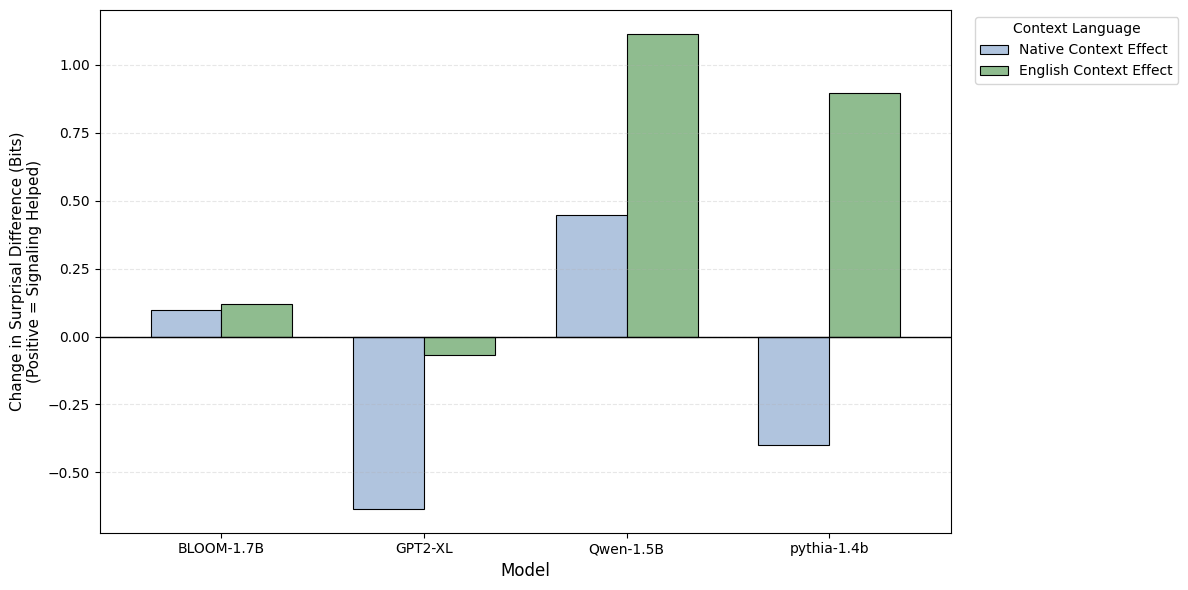

In [ ]:
# Deviation in violation awareness with signaling, and without signaling

df_diff_sig_v_nosig = df_diff_sig - df_diff_no_sig
print(df_diff_sig_v_nosig)

sig_nosig_diff_colors = [
    'lightsteelblue',
    'darkseagreen'
]

ax = df_diff_sig_v_nosig.plot(
    kind="bar",
    capsize=4,
    figsize=(12, 6),
    width=0.7,
    color=sig_nosig_diff_colors,
    rot=0,
    edgecolor='black',
    linewidth=0.8
)


plt.title("The Effect of Explicit Signaling: How much did 'In China' help?", fontsize=14)
plt.ylabel("Change in Surprisal Difference (Bits)\n(Positive = Signaling Helped)", fontsize=11)
plt.xlabel("Model", fontsize=12)
plt.axhline(0, color='black', linewidth=1)
plt.legend(title="Context Language", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()